## 0. Preperation

- Install latest version of SAHI and Torchvision:

In [1]:
!pip install git+https://github.com/kadirnar/sahi.git@torchvision

  Cloning https://github.com/kadirnar/sahi.git (to revision torchvision) to /tmp/pip-req-build-qxlxroi5
  Running command git clone -q https://github.com/kadirnar/sahi.git /tmp/pip-req-build-qxlxroi5
  Running command git checkout -b torchvision --track origin/torchvision
  Switched to a new branch 'torchvision'
  Branch 'torchvision' set up to track remote branch 'torchvision' from 'origin'.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
!pip install torchvision

In [3]:
import os
os.getcwd()

'/content'

In [4]:
cd //content/drive/MyDrive/sahi

/content/drive/MyDrive/sahi


- Import required modules:

In [5]:
# will be used for torchvision fasterrcnn model zoo name
from sahi.utils.torchvision import TorchVisionTestConstants, download_torchvision_model

# import required functions, classes
from sahi.model import TorchVisionDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

In [6]:
# set torchvision fasterrcnn model and config zoo name
download_torchvision_model()
model_path = TorchVisionTestConstants.FASTERCNN_MODEL_PATH,
config_path = TorchVisionTestConstants.FASTERCNN_CONFIG_ZOO_NAME,

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a Torchvision Model

- Instantiate a torchvision model by defining model weight path, confing path and other parameters:

In [7]:
detection_model = TorchVisionDetectionModel(
    model_path=TorchVisionTestConstants.FASTERCNN_MODEL_PATH,
    config_path=TorchVisionTestConstants.FASTERCNN_CONFIG_ZOO_NAME,
    confidence_threshold=0.5,
    image_size=640,
    device="cpu", 
    load_at_init=True,
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [8]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [9]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

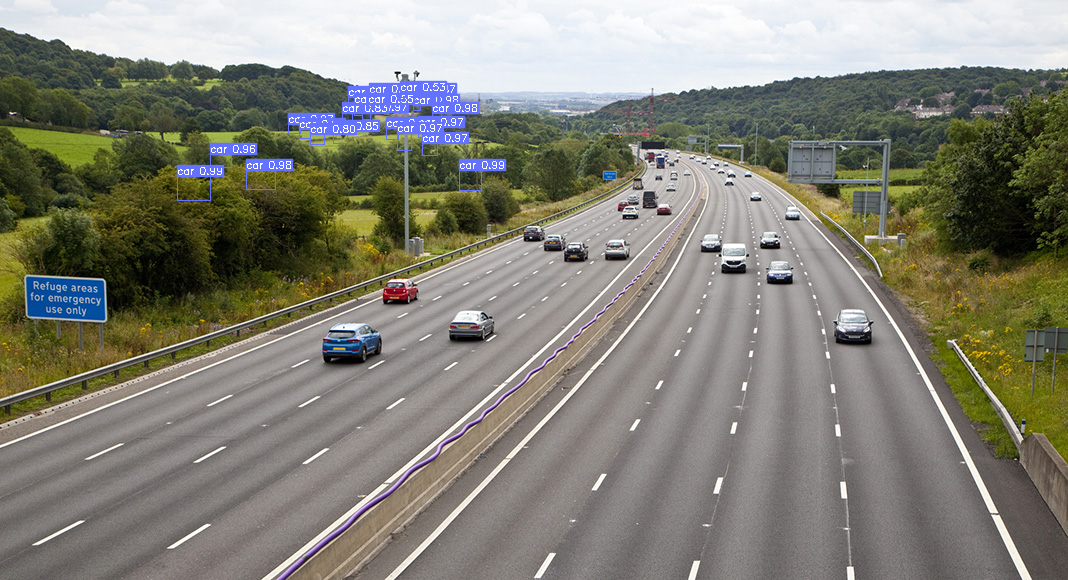

In [10]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a Detectron2 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [11]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 15 number of slices.


IndexError: ignored

- Visualize predicted bounding boxes and masks over the original image:

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
result.to_coco_annotations()[:3]

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
!pip install -U imantics

In [ ]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [ ]:
model_type = "torchvision"
model_path = model_path
model_config_path = model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.5

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_config_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)